In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

home = Path("/Volumes/LaCie/smb/smb")

In [2]:
from lib.bisicles_defaults import GRID_8KM
x, y = GRID_8KM

bedmachine = xr.open_dataset("/Users/jonniebarnsley/data/BedMachine/BedMachine_antarctica_v3_bisicles_8km.nc")
bedmachine = bedmachine.assign_coords(x=x, y=y)
ice = bedmachine.thickness > 0

In [3]:
data = {}
for scenario in ['historical', 'ssp126', 'ssp585', 'ssp534-over']:
    data_dir = home / scenario
    data[scenario] = {}
    for file in data_dir.glob("*.nc"):
        ds = xr.open_dataset(file)
        model = file.stem.split("_")[1]
        data[scenario][model] = ds.evspsbl.where(ice).mean(dim=['x', 'y'])

Text(0.5, 1.0, 'Historical Antarctic Evaposublimation')

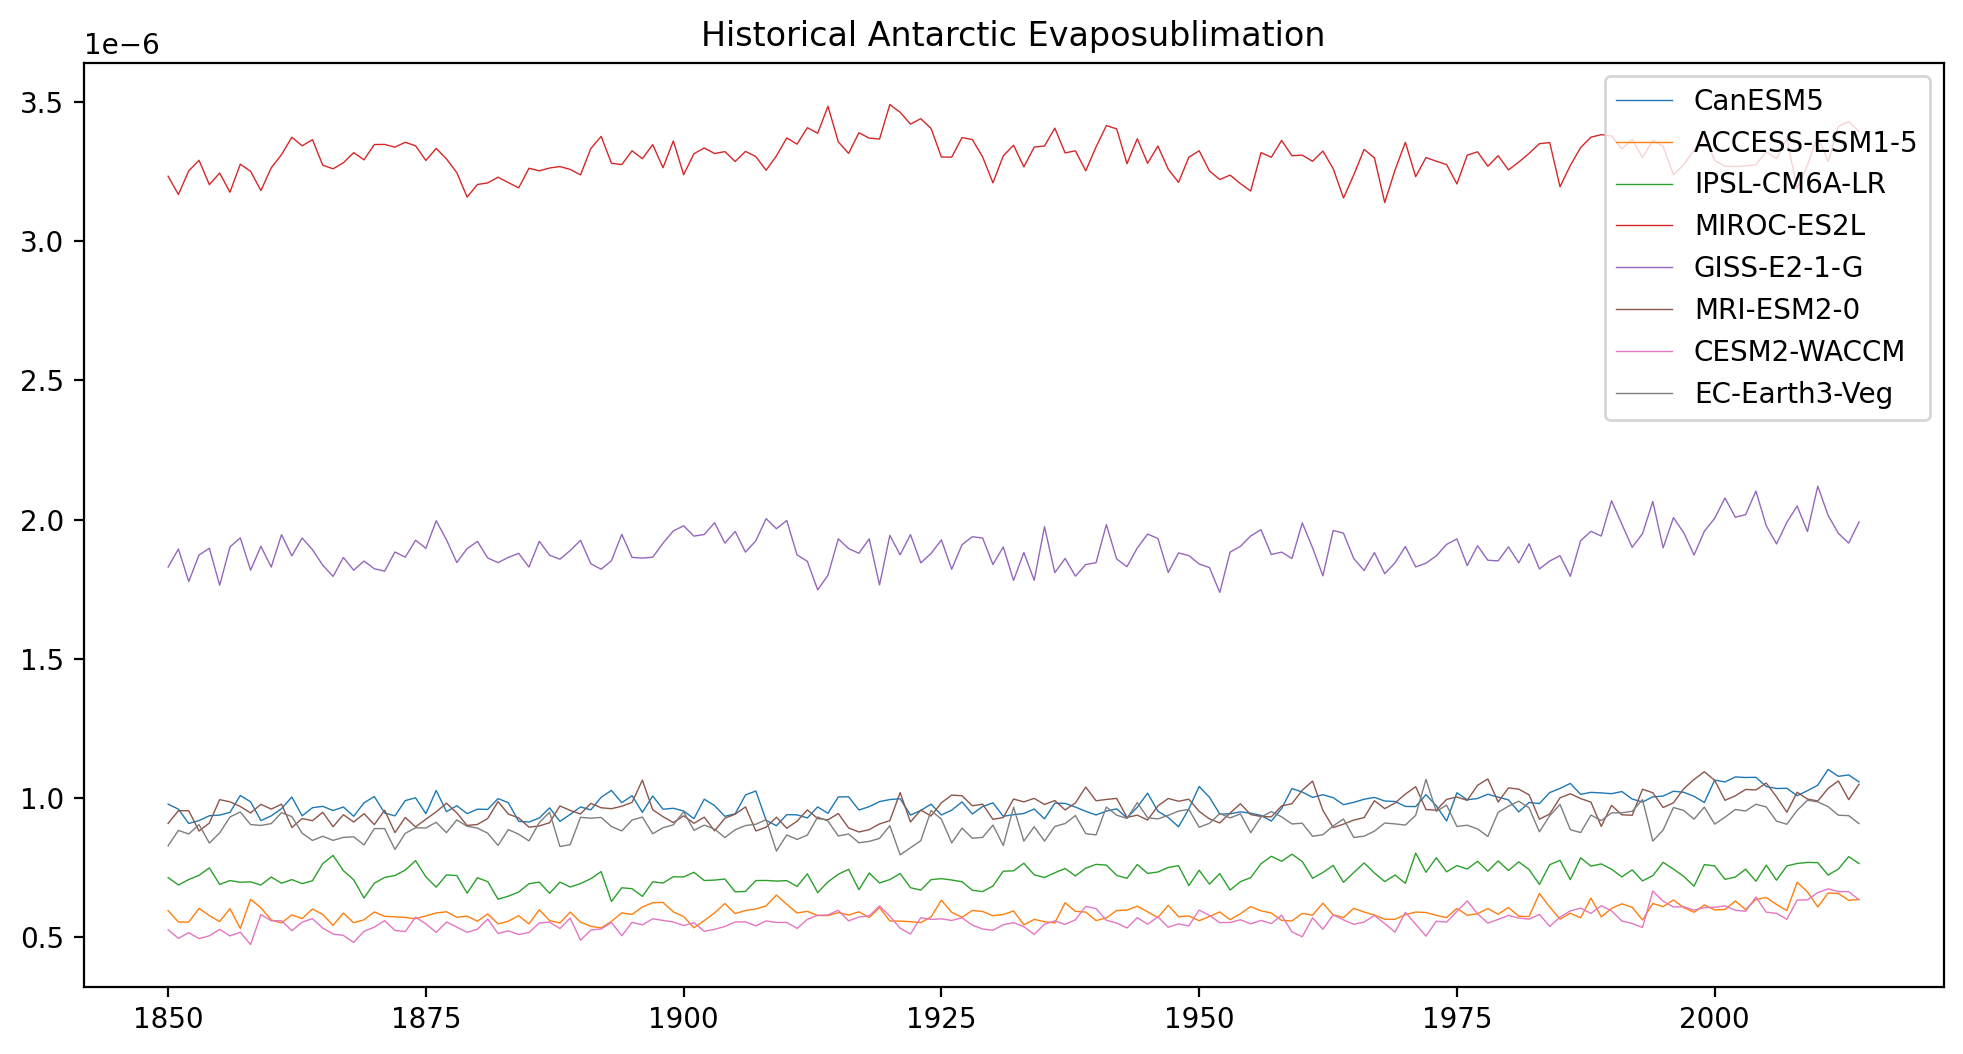

In [8]:
fig, ax = plt.subplots(figsize = (12, 6), dpi=200)
for model, evspsbl in data['historical'].items():
    ax.plot(evspsbl.time, evspsbl, label=model, lw = 0.5)
plt.legend()
plt.title("Historical Antarctic Evaposublimation")

Text(0.5, 1.0, 'SSP126 Antarctic Evaposublimation')

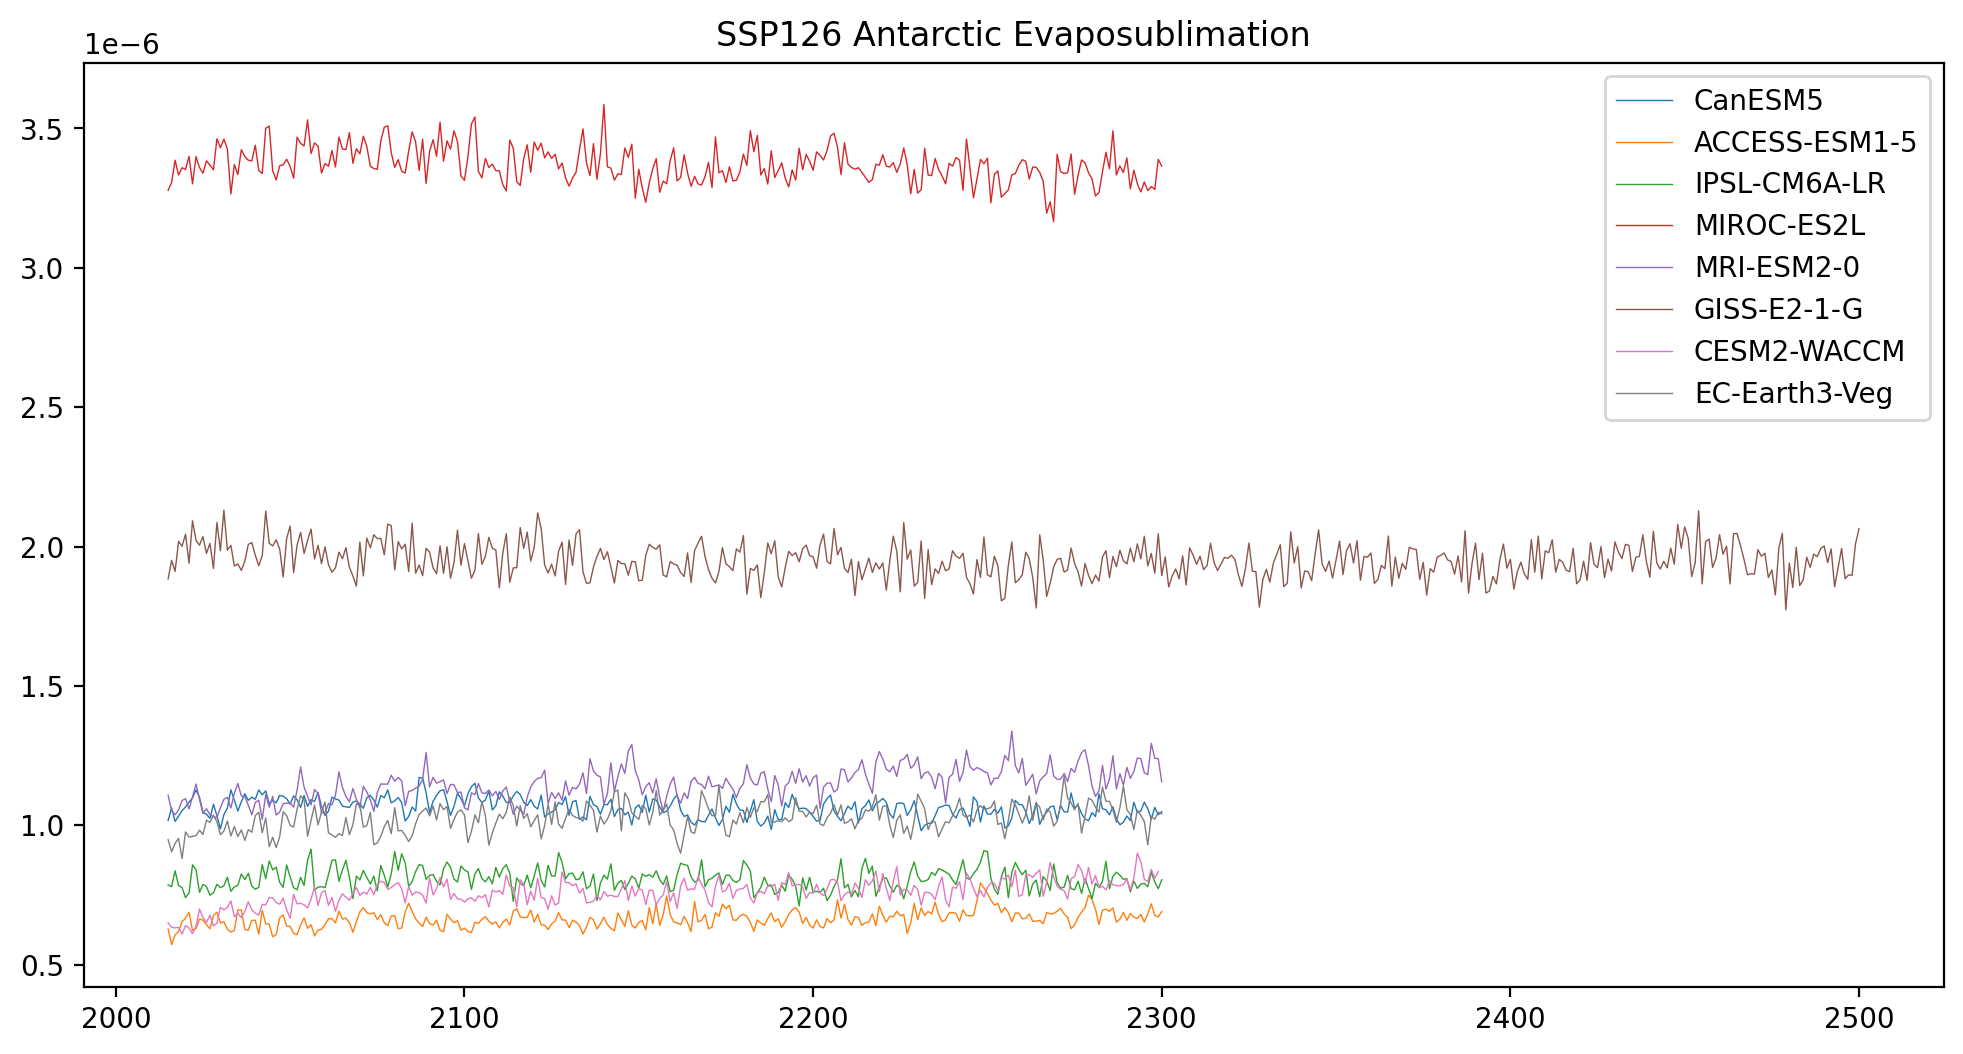

In [9]:
fig, ax = plt.subplots(figsize = (12, 6), dpi=200)
for model, evspsbl in data['ssp126'].items():
    ax.plot(evspsbl.time, evspsbl, label=model, lw = 0.5)
plt.legend()
plt.title("SSP126 Antarctic Evaposublimation")

Text(0.5, 1.0, 'SSP585 Antarctic Evaposublimation')

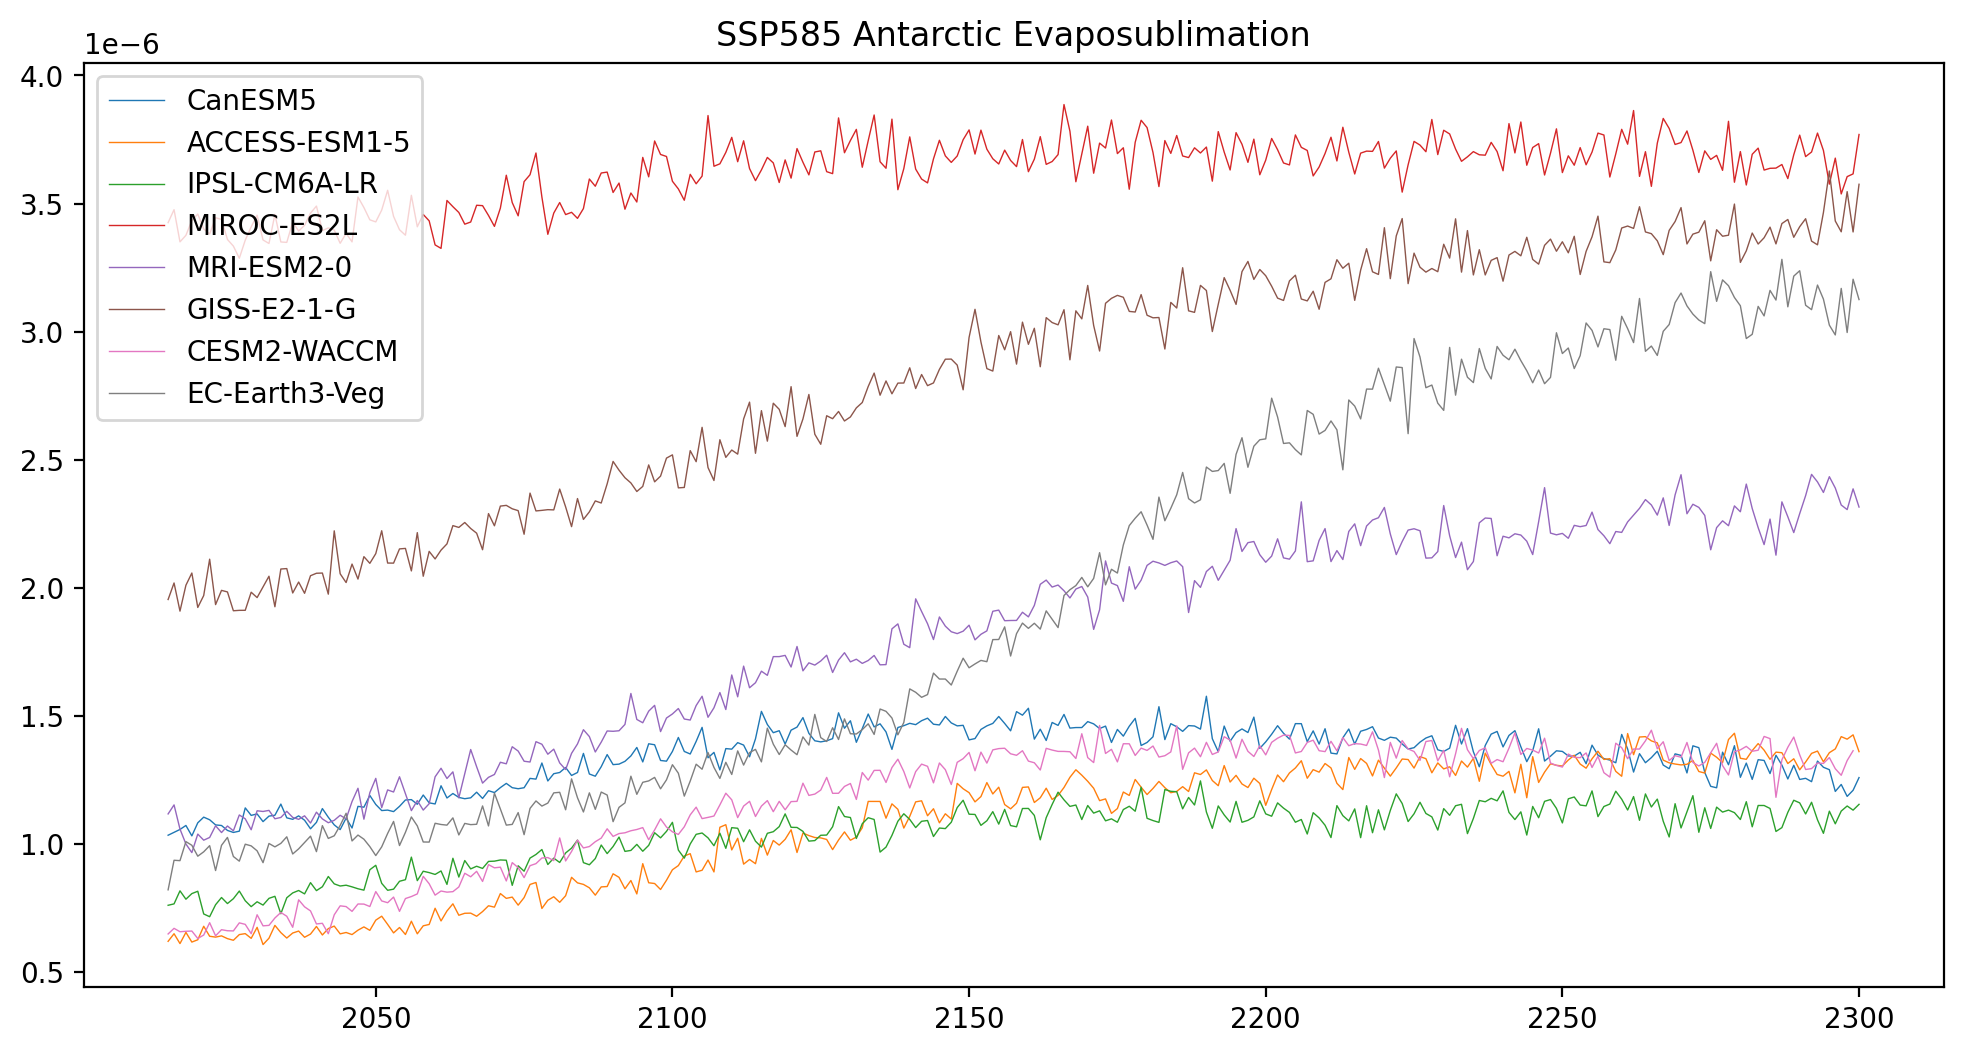

In [10]:
fig, ax = plt.subplots(figsize = (12, 6), dpi=200)
for model, evspsbl in data['ssp585'].items():
    ax.plot(evspsbl.time, evspsbl, label=model, lw = 0.5)
plt.legend()
plt.title("SSP585 Antarctic Evaposublimation")

Text(0.5, 1.0, 'SSP534-over Antarctic Evaposublimation')

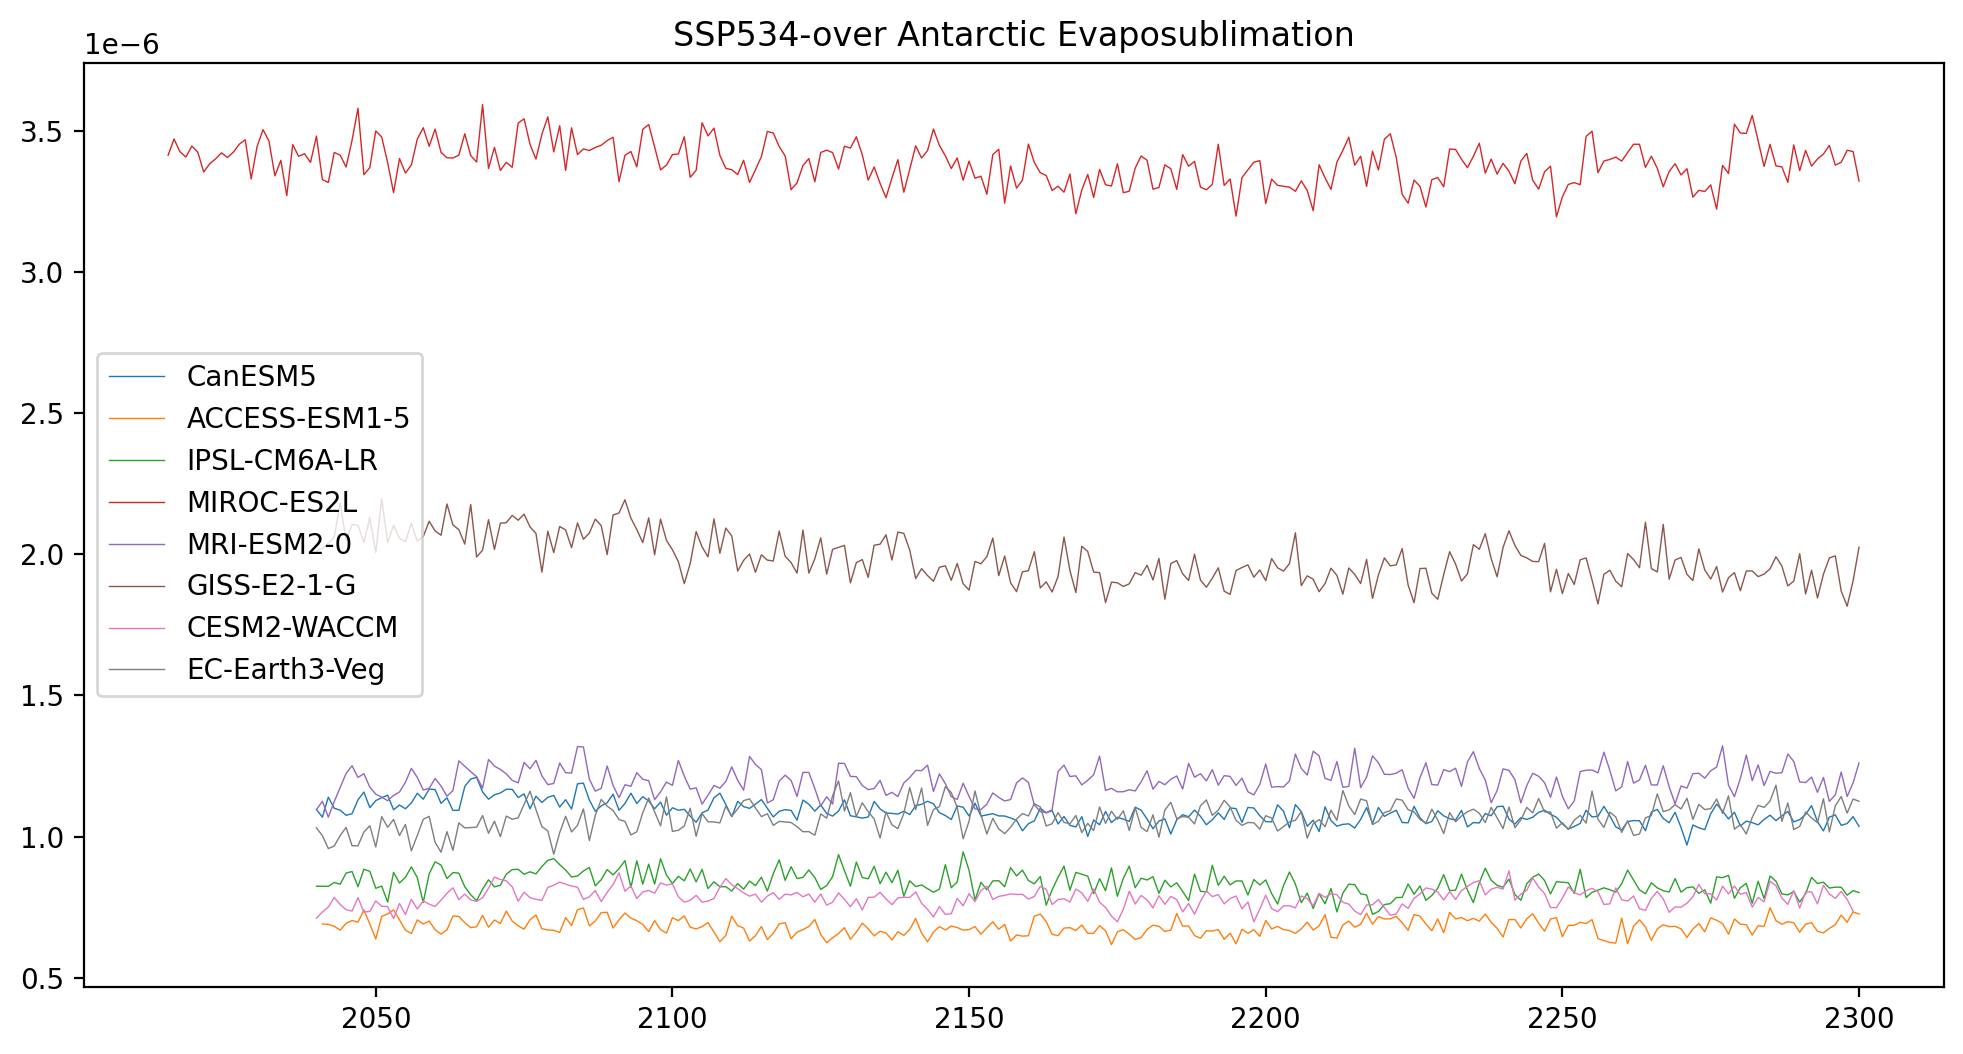

In [11]:
fig, ax = plt.subplots(figsize = (12, 6), dpi=200)
for model, evspsbl in data['ssp534-over'].items():
    ax.plot(evspsbl.time, evspsbl, label=model, lw = 0.5)
plt.legend()
plt.title("SSP534-over Antarctic Evaposublimation")